In [188]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [223]:
A, m, z, del_N, del_H = symbols('A m z {\delta}N {\delta}H', real=True)

In [310]:
# Number of N discontinuities
n = 4

# # Therefore n+1 values of N
# N_sym_str = ['N_{}'.format(i) for i in range(n+1)]
# N_sym_str = ' '.join(N_sym_str)
# N = symbols(N_sym_str, real=True)

# # And n values of H
# H_sym_str = ['H_{}'.format(i) for i in range(n)]
# H_sym_str = ' '.join(H_sym_str)
# H = symbols(H_sym_str, real=True)

# Alternatively
H_0, N_0 = symbols('H_0 N_0', real=True)
H = [H_0 + j*del_H for j in range(n)]
N = [N_0 + j*del_N for j in range(n+1)]

# And n+1 expressions for psi
# Initialise these as None
psi = [None for i in range(n+1)]

# n expressions for the Ak and Bk coefficients
Ak = [None for i in range(n+1)]
Bk = [None for i in range(n+1)]

In [311]:
Ak[n] = A
Bk[n] = 0
psi[n] = Ak[n]*exp(I*m*N[n]*(z-H[n-1]))

Ak[n-1] = A*(N[n-1]+N[n])/(2*N[n-1])
Bk[n-1] = A*(N[n-1]-N[n])/(2*N[n-1])
psi[n-1] = Ak[n-1]*exp(I*m*N[n-1]*(z-H[n-1])) + Bk[n-1]*exp(-I*m*N[n-1]*(z-H[n-1]))

In [312]:
for j in range(n-1, 0, -1):
    Ak[j-1] = (
        Ak[j]*(N[j]+N[j-1])/(2*N[j-1])*exp(-I*m*N[j]*del_H)
        + Bk[j]*(N[j-1]-N[j])/(2*N[j-1])*exp(I*m*N[j]*del_H))
    Bk[j-1] = (
        Ak[j]*(-N[j]+N[j-1])/(2*N[j-1])*exp(-I*m*N[j]*del_H)
        + Bk[j]*(N[j-1]+N[j])/(2*N[j-1])*exp(I*m*N[j]*del_H))
    psi[j-1] = Ak[j-1]*exp(I*m*N[j-1]*(z-H[j-1])) + Bk[j-1]*exp(-I*m*N[j-1]*(z-H[j-1]))

In [313]:
A_num = 1
N0_num = 1
del_N_num = 2/n
del_H_num = 1/n
m_num = 1
H0_num = 1

# Incident
A_inc = np.abs(
    Ak[0].subs(A, A_num).subs(N_0, N0_num).subs(
        del_N, del_N_num).subs(del_H, del_H_num).subs(m, m_num).evalf())

# Reflected
A_ref = np.abs(
    Bk[0].subs(A, A_num).subs(N_0, N0_num).subs(
        del_N, del_N_num).subs(del_H, del_H_num).subs(m, m_num).evalf())

In [314]:
A_ref/A_inc

0.297894192510142

In [315]:
A_num/A_inc

0.551137928915782

In [297]:
1/np.sqrt(3)

0.5773502691896258

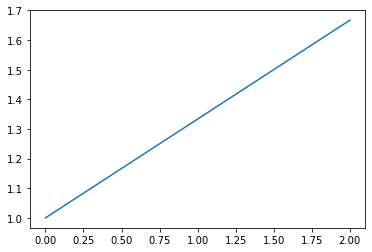

In [222]:
plt.plot([h.subs(H_0,H0_num).subs(del_H,del_H_num) for h in H])

In [275]:
plt.plot([bk.subs(H_0,H0_num).subs(del_H,del_H_num) for bk in Bk])
plt.plot([ak.subs(H_0,H0_num).subs(del_H,del_H_num) for ak in Ak])

AttributeError: 'int' object has no attribute 'subs'

In [277]:
Ak

[-{\delta}N*(-A*{\delta}N*(2*N_0 + 3*{\delta}N)*exp(I*m*{\delta}H*(N_0 + 2*{\delta}N))/((2*N_0 + 2*{\delta}N)*(2*N_0 + 4*{\delta}N)) - A*{\delta}N*(2*N_0 + 5*{\delta}N)*exp(-I*m*{\delta}H*(N_0 + 2*{\delta}N))/((2*N_0 + 2*{\delta}N)*(2*N_0 + 4*{\delta}N)))*exp(I*m*{\delta}H*(N_0 + {\delta}N))/(2*N_0) + (2*N_0 + {\delta}N)*(A*{\delta}N**2*exp(I*m*{\delta}H*(N_0 + 2*{\delta}N))/((2*N_0 + 2*{\delta}N)*(2*N_0 + 4*{\delta}N)) + A*(2*N_0 + 3*{\delta}N)*(2*N_0 + 5*{\delta}N)*exp(-I*m*{\delta}H*(N_0 + 2*{\delta}N))/((2*N_0 + 2*{\delta}N)*(2*N_0 + 4*{\delta}N)))*exp(-I*m*{\delta}H*(N_0 + {\delta}N))/(2*N_0),
 A*{\delta}N**2*exp(I*m*{\delta}H*(N_0 + 2*{\delta}N))/((2*N_0 + 2*{\delta}N)*(2*N_0 + 4*{\delta}N)) + A*(2*N_0 + 3*{\delta}N)*(2*N_0 + 5*{\delta}N)*exp(-I*m*{\delta}H*(N_0 + 2*{\delta}N))/((2*N_0 + 2*{\delta}N)*(2*N_0 + 4*{\delta}N)),
 A*(2*N_0 + 5*{\delta}N)/(2*N_0 + 4*{\delta}N),
 A]